<a href="https://colab.research.google.com/github/EugeniaE/UTS_ML2019_Main/blob/master/As2_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multiclass image classification problem using Convolutional Neural Networks

###Introduction

The problem chosen is Image Classification. I decided to do it as I am personally interested in this area and the field of Computer Vision is growing rapidly and there are a lot of practical application for this task.  The dataset I used may be not very representative in terms of real practical application but can be used as a demonstration of computers ability to ‘see’ and define what is there exactly on the picture. This field is applicable to many business areas nowadays, just some examples – cameras detecting cars on the road with some defects or parked in a wrong place, self-checkout in the shops, detection of defects in manufacture, medical diagnostics using images and much more. I chose the dataset above just due to its optimal size due to limited GPU and time constraints. And also, this dataset in not so well discovered in the internet, so it is good for experiments with image classification.

Dataset was taken in Kaggle: 
https://www.kaggle.com/puneet6060/intel-image-classification

It contains around 25000 images of size 150x150 distributed under 6 categories:
* 'buildings' -> 0,
*'forest' -> 1, 
*'glacier' -> 2, 
*'mountain' -> 3,
*'sea' -> 4,
*'street' -> 5.

There are around 14000 images in Train, 3000 in Test and 7000 in Prediction. As we do not have results for prediction dataset I used test dataset as validation to see the models performance. At the end I also did some random single photo predictions from prediction dataset.







###Exploration and methodology

Potential challenges with this task include: 
-quite small size of pictures -  150X150,  almost impossible to make them bigger without loss of quality. May be not enough features for classification. But small size is good for processing, it makes it faster.  Just to mention – pictures are well balances, similar number of images representing each class. From that perspective dataset is well prepared to make classification task easier.

-dataset is not well discovered, some kernels give good above 90% accuracy results but there is still big field for experimentation.
For my experiments I chose a few different CNN models:
-	Just random CNN with my own layers/parameters for the 1st experiment
-	Same model as 1st one but with addition of data augmentation – just to add some variance to the images and potentially to improve performance.
-	AlexNet – as one of the oldest CNNs. Even though pictures are smaller then required for original AlexNet (224X224), I resized them with ImageDataGenerator.
-	I tried to apply transfer learning and see how modern existing pretrained networks can easily solve this task.

I also tried to apply Knn and SVM to the task, to see how simple algorithms can solve the problem, but then decided not to do it as it took too much time to train and results were worse even with feature extraction.

I used ImageDataGenerator for preprocessing because it helps to keep consistency, pictures are all of same size for 100%. It also helps with data augmentation and makes coding quite simple and straitforward.

Results and reflections will be given further on the way for each experiment.

### Import required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

base_dir = '/content/gdrive/My Drive/ML_Assignment2/ML_Intel_Image_Dataset'
train_dir = os.path.join(base_dir, 'seg_train')
validation_dir = os.path.join(base_dir, 'seg_test')
prediction_dir=os.path.join(base_dir, 'seg_pred')

# Directory with our training building pictures
train_bld_dir = os.path.join(train_dir, 'buildings')
# Directory with our training forest pictures
train_for_dir = os.path.join(train_dir, 'forest')
# Directory with our training glasier pictures
train_glc_dir = os.path.join(train_dir, 'glacier')
# Directory with our training mountain pictures
train_mnt_dir = os.path.join(train_dir, 'mountain')
# Directory with our training sea pictures
train_sea_dir = os.path.join(train_dir, 'sea')
# Directory with our training street pictures
train_str_dir = os.path.join(train_dir, 'street')

# Directory with our training building pictures
validation_bld_dir = os.path.join(validation_dir, 'buildings')
# Directory with our training forest pictures
validation_for_dir = os.path.join(validation_dir, 'forest')
# Directory with our training glacier pictures
validation_glc_dir = os.path.join(validation_dir, 'glacier')
# Directory with our training mountain pictures
validation_mnt_dir = os.path.join(validation_dir, 'mountain')
# Directory with our training sea pictures
validation_sea_dir = os.path.join(validation_dir, 'sea')
# Directory with our training street pictures
validation_str_dir = os.path.join(validation_dir, 'street')

##1. CNN Model

I experimented with hyperparamethers and adding/removing layers, the model below shows relatively good results and training doesn`t take too long.

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(6,activation='sigmoid'), 
])

In [0]:
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

###Prepare images with ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(rescale=1/255) 
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size= (150,150), 
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150), 
        batch_size=20,
        class_mode='sparse' 
) 

Found 14042 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [28]:
history1 = model1.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

Epoch 1/100
100/100 - 196s - loss: 1.4374 - acc: 0.4310 - val_loss: 1.2748 - val_acc: 0.4800
Epoch 2/100
100/100 - 8s - loss: 1.2007 - acc: 0.5225 - val_loss: 1.2579 - val_acc: 0.5200
Epoch 3/100
100/100 - 7s - loss: 1.0999 - acc: 0.5585 - val_loss: 1.1040 - val_acc: 0.5730
Epoch 4/100
100/100 - 7s - loss: 1.0597 - acc: 0.5915 - val_loss: 1.0230 - val_acc: 0.5990
Epoch 5/100
100/100 - 7s - loss: 1.0410 - acc: 0.5950 - val_loss: 0.9405 - val_acc: 0.6370
Epoch 6/100
100/100 - 8s - loss: 0.9719 - acc: 0.6340 - val_loss: 1.0177 - val_acc: 0.6000
Epoch 7/100
100/100 - 7s - loss: 0.9411 - acc: 0.6312 - val_loss: 0.9674 - val_acc: 0.6500
Epoch 8/100
100/100 - 8s - loss: 0.8985 - acc: 0.6580 - val_loss: 0.9908 - val_acc: 0.6010
Epoch 9/100
100/100 - 8s - loss: 0.8716 - acc: 0.6760 - val_loss: 0.7862 - val_acc: 0.7070
Epoch 10/100
100/100 - 7s - loss: 0.8581 - acc: 0.6680 - val_loss: 0.8238 - val_acc: 0.6820
Epoch 11/100
100/100 - 7s - loss: 0.8574 - acc: 0.6922 - val_loss: 0.8272 - val_acc: 0.

## Result 1.
The result above is after 100 epochs. Accuracy of 92% on training and 85 on validation dataset.

Below is the comparison of accuracy and loss change during 100 epochs of training on training and validation datasets. We see that accuracy goes up and loss goes down. But after about 50 epochs results start differ on training and validation datasets. This means that model learned training dataset well, so training accuracy goes up. But validation accuracy stays lower. This means that model cannot generalize very well on the data it didn`t see. Or we can also say that it is overfitting.


### Visualisation of result 1

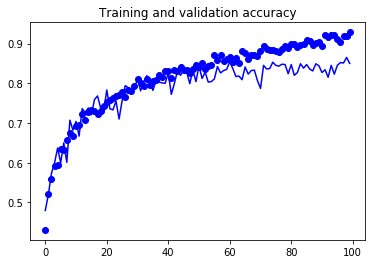

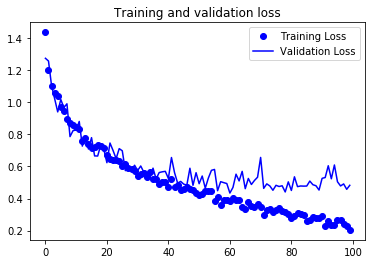

In [29]:
import matplotlib.pyplot as plt
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##2. Create same model for augmented data - just not to mix them up


In [0]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(6,activation='sigmoid'), 
])

###Prepare images and augment data with ImageDataGererator

Augmentation can help to solve problem of overfitting by adding variance to the dastaset.

In [20]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255) 

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='sparse')

Found 14042 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [22]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50, 
      verbose=2)

Epoch 1/100
100/100 - 20s - loss: 0.7487 - acc: 0.7295 - val_loss: 0.6517 - val_acc: 0.7880
Epoch 2/100
100/100 - 17s - loss: 0.7289 - acc: 0.7290 - val_loss: 0.7315 - val_acc: 0.7560
Epoch 3/100
100/100 - 17s - loss: 0.7356 - acc: 0.7210 - val_loss: 0.7595 - val_acc: 0.7330
Epoch 4/100
100/100 - 17s - loss: 0.7020 - acc: 0.7415 - val_loss: 0.7375 - val_acc: 0.7500
Epoch 5/100
100/100 - 16s - loss: 0.6991 - acc: 0.7462 - val_loss: 0.7355 - val_acc: 0.7680
Epoch 6/100
100/100 - 18s - loss: 0.6936 - acc: 0.7455 - val_loss: 0.7410 - val_acc: 0.7540
Epoch 7/100
100/100 - 16s - loss: 0.7104 - acc: 0.7410 - val_loss: 0.9818 - val_acc: 0.6830
Epoch 8/100
100/100 - 18s - loss: 0.7117 - acc: 0.7505 - val_loss: 0.6905 - val_acc: 0.7820
Epoch 9/100
100/100 - 17s - loss: 0.6646 - acc: 0.7560 - val_loss: 0.7180 - val_acc: 0.7650
Epoch 10/100
100/100 - 17s - loss: 0.6769 - acc: 0.7595 - val_loss: 0.6969 - val_acc: 0.7800
Epoch 11/100
100/100 - 18s - loss: 0.6849 - acc: 0.7445 - val_loss: 0.8457 - va

## Result 2.
The result above is after 150 epochs, I started with 50 when it reached about 70% accuracy and then trained for 100 extra epochs. They helped to achieve accuracy of 81% on training and 77 on validation dataset.

Below is the comparison of accuracy and loss change during last 100 epochs of training on training and validation datasets. We see that accuracy goes up and loss goes down. Training and validation results are very close to each other, this means that there is no overfitting (or a least less overfitting) and that the model trained on training dataset also performs well on validation dataset. There are fluctations along the training which can be caused by backpropagation.

Even though overall accuracy is lower that in 1st case this model is more stable. So if continue training accuracy can be increased.

###Visualisation of result 2

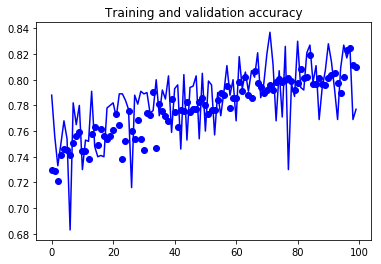

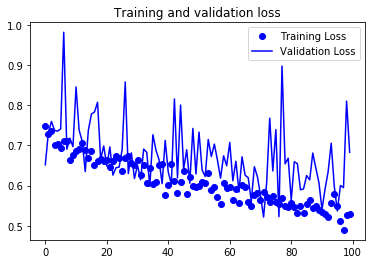

In [23]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##3. Create AlexNet Architecture

In [0]:
model3 = tf.keras.models.Sequential([
     #original model was built for input shape of 224X224
    tf.keras.layers.Conv2D(96, (11,11),strides=4, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (11,11),strides=1, padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(384, (3,3),strides=1, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3,3),strides=1, padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2),padding='valid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation='sigmoid')
    ])


###Prepare images with ImageDataGenerator

For this model I also added data augmentation as it helps to avoid overfitting based on previous experiment. Image size was changed to 224X224 as per original AlexNet.

In [31]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(224, 224), 
        batch_size=20,
        class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='sparse')

Found 14042 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [34]:
history3 = model3.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10, 
      verbose=2)

Epoch 1/100
100/100 - 51s - loss: 1.6655 - acc: 0.3270 - val_loss: 1.7679 - val_acc: 0.2000
Epoch 2/100
100/100 - 26s - loss: 1.4934 - acc: 0.4090 - val_loss: 1.7019 - val_acc: 0.2200
Epoch 3/100
100/100 - 29s - loss: 1.4222 - acc: 0.4450 - val_loss: 1.6548 - val_acc: 0.3400
Epoch 4/100
100/100 - 29s - loss: 1.4152 - acc: 0.4350 - val_loss: 1.5150 - val_acc: 0.4000
Epoch 5/100
100/100 - 28s - loss: 1.4043 - acc: 0.4551 - val_loss: 1.3348 - val_acc: 0.5350
Epoch 6/100
100/100 - 29s - loss: 1.3337 - acc: 0.4830 - val_loss: 1.1514 - val_acc: 0.5550
Epoch 7/100
100/100 - 29s - loss: 1.3770 - acc: 0.4705 - val_loss: 2.8171 - val_acc: 0.3900
Epoch 8/100
100/100 - 29s - loss: 1.3787 - acc: 0.5055 - val_loss: 2.7167 - val_acc: 0.4200
Epoch 9/100
100/100 - 29s - loss: 1.3790 - acc: 0.4740 - val_loss: 7.2828 - val_acc: 0.2350
Epoch 10/100
100/100 - 28s - loss: 1.3656 - acc: 0.5090 - val_loss: 1.6930 - val_acc: 0.5300
Epoch 11/100
100/100 - 29s - loss: 1.3743 - acc: 0.5090 - val_loss: 1.7175 - va

## Result 3.
The result above is after 100 epochs. Final accuracy is 64% on training and 71 on validation dataset.

Below is the comparison of accuracy and loss change during 100 epochs of training on training and validation datasets. We see that accuracy goes up and loss goes down but very slow. Many fluctations on the way.

My assumption is that accuracy can be low due to original size of images - 150X150. We had to increase them to 224X224 that could result in bad quality. Further experiments would help but due to limited time I didn`t make many experiments with hyperparameters on this model.

### Visualization of result 3

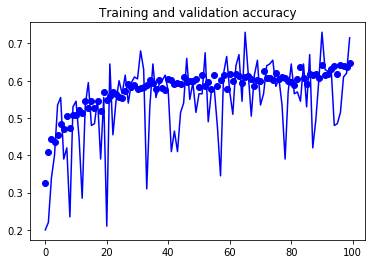

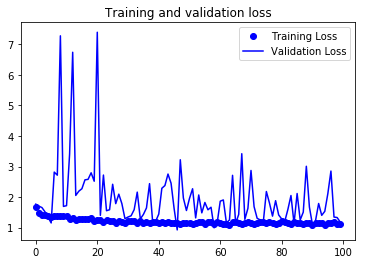

In [35]:
import matplotlib.pyplot as plt
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##4. Resnet 50

As a final experiment I used pretrained model available on keras, just to see how we can use transfer learning easily to solve tasks like image recognition.

In [36]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load the ResNet50 model with pretrained weights
model = ResNet50(weights='imagenet')

Using TensorFlow backend.




102858752/102853048 [==============================] - 4s 0us/step


Predicted: [('n03457902', 'greenhouse', 0.23197414), ('n04371774', 'swing', 0.07925064), ('n03733281', 'maze', 0.044427656)]


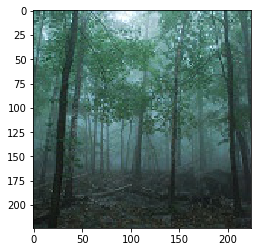

In [42]:
img_path = '/content/gdrive/My Drive/ML_Assignment2/ML_Intel_Image_Dataset/seg_test/forest/20100.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

We can see that it can predict more narrow categories.

## Conclusion

I believe quite good results were achieved in my experiments but of course they can be improved with further experimentation and deeper knowledge of structure of Neural Networks. Maximum accuracy on training dataset 92% and 85% on validation dataset. Model 2 showed best result from stability perspective, so if continue training it could perform better.

##Ethical issues

Every new technology is starting the conversation about ethics. From ethical perspective the question of Computer Vision is not obvious. From 1 perspective it may be scary if we enable cameras to control every our step, analyze pictures and learn further from it. But this opportunity also gives us so many benefits:

-ability to avoid human mistakes – such as finding defects or medical diagnostics

-feel us more safe if some reaction is provided to potential danger – shark spotting, security cameras.

Problems could be:

-loss of jobs for some groups of people – for example in cases when cashiers are replaced by self-checkouts

-using of our data against us – as security cameras are monitored by people at the end we need to be confident in people involved.

This question is not easy to discuss in a few words and impossible to resolve entirely. We just have to take our own responsibility to people when we do our job and have access to some personal information. And also try to use technology for better only in the fields where human brain cannot perform very well or tends to make mistakes.
